<a href="https://colab.research.google.com/github/Ali-mohammadi-design/ML-practice/blob/main/Fashion_Class_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
fashion_train_df= pd.read_csv('/content/fashion-mnist_train.csv')
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_test_df= pd.read_csv('/content/fashion-mnist_test.csv')
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Note: in the dataset, each row demonstrates a picture and each columns is representing the value of that specific pixel. all pictures have (28*28) pixels that is why we have 784 pixel columns. The label is representing the photo number

In [7]:
type(fashion_train_df)

pandas.core.frame.DataFrame

In [8]:
fashion_train_df.shape

(60000, 785)

As we can see we have 60000 photos and 784 pixels and onel label column

In [9]:
fashion_test_df.shape

(10000, 785)

Converting datafram to array

In [10]:
training= np.array(fashion_train_df, dtype='float32')

In [11]:
type(training)

numpy.ndarray

In [12]:
testing= np.array(fashion_test_df, dtype='float32')

Showing img randomly

Using reshape() to frame data as 28 arrays that every one has 28 data

the label is 6.0
this is the img number 1113


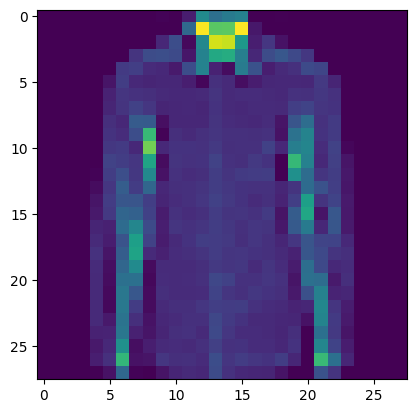

In [13]:
import random
i=random.randint(1,6000)
plt.imshow(training[i,1:].reshape(28,28))
label=training[i,0]
print(f"the label is {label}")
print(f"this is the img number {i}")

Good definition about convolution and max pulling, densing and flatting on second prj on "Machine Learning Practical" in Udemy

Training

In [93]:
x_train= training[:,1:]/255
y_train= training[:,0]
y_train.shape

(60000,)

In [94]:
x_test= testing[:,1:]/255
y_test= testing[1,0]

In [95]:
from sklearn.model_selection import train_test_split

In [100]:
x_train,x_validate, y_train,y_validate = train_test_split(x_train,y_train, test_size=0.2, random_state= 12345)

In [101]:
x_train.shape

(38400, 28, 28, 1)

In [102]:
x_train=x_train.reshape(x_train.shape[0], *(28,28,1))
x_test=x_test.reshape(x_test.shape[0], *(28,28,1))
x_validate=x_validate.reshape(x_validate.shape[0], *(28,28,1))

In [103]:
x_train.shape

(38400, 28, 28, 1)

In [104]:
x_test.shape

(10000, 28, 28, 1)

In [105]:
x_validate.shape

(9600, 28, 28, 1)

Training the model with tensorflow and keras

In [106]:
import keras

In [107]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam


cnn means convolutional neural network

In [108]:
cnn_model= Sequential()

In [109]:
cnn_model.add(Conv2D(32,3,3, input_shape=(28, 28,1), activation= 'relu'))

In [110]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [111]:
cnn_model.add(Flatten())

In [112]:
cnn_model.add(Dense(units=32, activation='relu'))

In [113]:
cnn_model.add(Dense(units=10, activation='sigmoid'))

In [117]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [118]:
epochs=50

In [119]:
cnn_model.fit(x_train, y_train, batch_size=512, epochs=epochs, verbose=1, validation_data= (x_validate, y_validate))

Epoch 1/50
75/75 [==============================] - 3s 26ms/step - loss: 1.6223 - accuracy: 0.4861 - val_loss: 0.9287 - val_accuracy: 0.6966
Epoch 2/50
75/75 [==============================] - 2s 23ms/step - loss: 0.7833 - accuracy: 0.7258 - val_loss: 0.6985 - val_accuracy: 0.7433
Epoch 3/50
75/75 [==============================] - 2s 23ms/step - loss: 0.6668 - accuracy: 0.7582 - val_loss: 0.6209 - val_accuracy: 0.7723
Epoch 4/50
75/75 [==============================] - 2s 33ms/step - loss: 0.6086 - accuracy: 0.7797 - val_loss: 0.5758 - val_accuracy: 0.7917
Epoch 5/50
75/75 [==============================] - 3s 33ms/step - loss: 0.5685 - accuracy: 0.7967 - val_loss: 0.5405 - val_accuracy: 0.8093
Epoch 6/50
75/75 [==============================] - 2s 24ms/step - loss: 0.5364 - accuracy: 0.8082 - val_loss: 0.5171 - val_accuracy: 0.8156
Epoch 7/50
75/75 [==============================] - 2s 27ms/step - loss: 0.5171 - accuracy: 0.8149 - val_loss: 0.4996 - val_accuracy: 0.8255
Epoch 8/50
75